In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import log_loss
%matplotlib inline
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [75]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [76]:
def join_feature_name_with_importance_value(features, importances):
    """
    Join via a list of tuples, feature names with their importance values
    :param features: data frame whose features are represented by columns used by classifier
    :param importances: feature importance scores assigned by classifier
    :return: sorted list (highest importances first) of feature,importance tuples
    """
    if features.columns.shape[0] != importances.shape[0]:
        return []

    feature_importances = []
    for item in range(features.columns.shape[0]):
        feature_importances.append((features.columns[item], abs(importances[item])))
    feature_importances_sorted = sorted(feature_importances, reverse=True, key=lambda kv: kv[1])

    return feature_importances_sorted


In [77]:
def display_important_features_regression(classifier, features):
    importances = classifier.coef_[0]
    #print("Importances: ", importances) 
    feature_importances = join_feature_name_with_importance_value(features, importances)
    print('Magnitudes of coefficients')
    for items in feature_importances:
        print(items[0]," ", items[1])

In [78]:
game_data = pd.read_csv('D1_2015_Training_Data.csv')
print("Number of records= ", game_data.shape[0])
game_data.tail(100)


Number of records=  5515


,scheduled_date,game_id,home_team,market,opp_market,points_game,game_result,opp_points_game,prn_enter_pts_avg,prn_enter_allow_pts_avg,...,opp_enter_allow_fg_pct,opp_enter_off_rebs_avg,opp_enter_allow_off_rebs_avg,opp_enter_def_rebs_avg,opp_enter_ft_att_avg,opp_enter_allow_ft_att_avg,opp_enter_ft_pct,opp_enter_turnover_avg,opp_enter_take_away_avg,opp_enter_win_pct
5415,2016-03-17 00:00:00.0000000,32f966e3-6312-4c12-bce1-3e7f6e8f98c4,True,North Dakota,UC Irvine,86,False,89,73.48,72.10,...,0.388768,8.56,9.16,25.59,20.63,19.94,0.686364,12.06,11.63,0.72
5416,2016-03-17 00:00:00.0000000,7280f1fe-17cc-4cb5-9caf-3fb99117b078,True,Purdue,Arkansas-Little Rock,83,False,85,77.74,64.59,...,0.390977,7.68,8.26,22.90,17.13,19.74,0.734463,9.68,13.39,0.87
5417,2016-03-17 00:00:00.0000000,382be62c-e8e1-480e-bae9-b4be288a3505,False,Texas A&M-CC,Louisiana-Lafayette,72,False,96,72.80,69.67,...,0.444903,12.66,7.90,25.03,26.03,21.45,0.695364,12.69,11.66,0.52
5418,2016-03-17 00:00:00.0000000,f78dc68c-cf37-4f6c-8feb-fa2e29b3333c,False,Tulsa,Michigan,62,False,67,74.00,69.68,...,0.448238,6.76,7.30,22.58,16.15,15.00,0.739212,9.15,11.45,0.64
5419,2016-03-17 00:00:00.0000000,2049d792-ccca-4894-872e-7e31dcdebf9c,True,Virginia Tech,Princeton,86,True,81,74.58,72.09,...,0.441964,8.59,8.30,24.81,20.26,17.44,0.712980,11.07,12.59,0.78
5420,2016-03-17 00:00:00.0000000,42f211ba-e9c0-489a-9916-9ec0762e730c,False,Yale,Baylor,79,True,75,74.48,63.52,...,0.447718,12.34,7.88,22.03,22.69,20.56,0.727273,12.50,13.31,0.66
5421,2016-03-18 00:00:00.0000000,267af1b7-9c86-4561-bf63-7a379cdaae6d,True,Arizona,Wichita State,55,False,65,81.21,69.00,...,0.381621,9.47,6.03,24.13,22.00,22.28,0.717330,9.38,14.81,0.75
5422,2016-03-18 00:00:00.0000000,18facb82-1039-4e50-9883-cb58fcf272c6,False,Cal State Bakersfield,Oklahoma,68,False,82,71.76,63.28,...,0.404644,9.44,10.06,26.69,20.22,17.28,0.727975,12.63,12.28,0.78
5423,2016-03-18 00:00:00.0000000,343bcea5-6c6d-417e-b5d2-348b865897b4,True,California,Hawaii,66,False,77,75.12,67.03,...,0.396104,9.07,8.27,25.43,26.13,22.17,0.686224,12.47,13.97,0.83
5424,2016-03-18 00:00:00.0000000,5c8b65d4-b962-4266-9641-bcf2fd72bcc5,False,Fresno State,Utah,69,False,80,74.63,71.16,...,0.415400,8.18,8.88,25.33,21.30,14.48,0.716927,11.73,10.15,0.76


In [79]:
game_data = game_data[game_data['scheduled_date'] > '2015-12-15'].copy()

encode_game_result = {"game_result": {False: "LOSS", True: "WIN"}}
game_data.replace(encode_game_result, inplace=True)

game_data['prn_enter_off_rating_avg'] = 100*game_data['prn_enter_pts_avg'] / game_data['prn_enter_possesion_avg']
game_data['opp_enter_off_rating_avg'] = 100*game_data['opp_enter_pts_avg'] / game_data['opp_enter_possesion_avg']

game_data.describe()


,points_game,opp_points_game,prn_enter_pts_avg,prn_enter_allow_pts_avg,prn_enter_possesion_avg,prn_enter_fg_pct,prn_enter_allow_fg_pct,prn_enter_off_rebs_avg,prn_enter_allow_off_rebs_avg,prn_enter_def_rebs_avg,...,opp_enter_allow_off_rebs_avg,opp_enter_def_rebs_avg,opp_enter_ft_att_avg,opp_enter_allow_ft_att_avg,opp_enter_ft_pct,opp_enter_turnover_avg,opp_enter_take_away_avg,opp_enter_win_pct,prn_enter_off_rating_avg,opp_enter_off_rating_avg
count,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,...,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000
mean,72.377493,72.332184,72.411061,72.282177,79.081511,0.435884,0.435646,9.254265,9.218823,23.584570,...,9.193396,23.693381,21.282494,21.197695,0.694619,12.547749,12.638651,0.509397,91.576488,91.696186
std,12.126187,12.231439,6.348497,6.013136,3.883253,0.031058,0.030154,1.739260,1.335345,2.149439,...,1.351518,2.133402,3.115838,3.234407,0.039474,1.451966,1.707315,0.217283,6.837106,6.572103
min,25.000000,35.000000,52.700000,53.880000,64.786666,0.329545,0.338667,4.050000,5.680000,14.250000,...,5.000000,15.800000,10.560000,11.890000,0.545000,8.330000,6.900000,0.000000,68.206991,68.167150
25%,64.000000,64.000000,68.210000,68.070000,76.771428,0.416768,0.413934,8.140000,8.240000,22.190000,...,8.190000,22.250000,19.160000,18.920000,0.669145,11.600000,11.500000,0.330000,87.474636,87.646528
50%,72.000000,72.000000,72.550000,71.730000,78.871428,0.435849,0.435829,9.190000,9.160000,23.520000,...,9.170000,23.650000,21.210000,21.330000,0.695804,12.560000,12.520000,0.530000,91.750828,91.794934
75%,80.000000,80.000000,76.810000,76.360000,81.500000,0.455261,0.455978,10.380000,10.090000,25.030000,...,10.110000,25.170000,23.350000,23.270000,0.721951,13.500000,13.650000,0.670000,96.040922,95.996210
max,125.000000,115.000000,91.670000,98.100000,95.506666,0.555351,0.551111,16.190000,14.710000,32.000000,...,15.670000,32.000000,33.300000,35.600000,0.859504,18.170000,22.220000,1.000000,116.657077,116.188452


In [80]:
numeric_feature_to_scale = ['prn_enter_off_rating_avg', 'prn_enter_allow_pts_avg', 
                            'prn_enter_off_rebs_avg', 'prn_enter_allow_off_rebs_avg',
                            'prn_enter_def_rebs_avg',
                            'prn_enter_ft_att_avg', 'prn_enter_allow_ft_att_avg',
                            'prn_enter_turnover_avg', 'prn_enter_take_away_avg',
                            'opp_enter_off_rating_avg', 'opp_enter_allow_pts_avg',
                            'opp_enter_off_rebs_avg', 'opp_enter_allow_off_rebs_avg',
                            'opp_enter_def_rebs_avg',
                            'opp_enter_ft_att_avg', 'opp_enter_allow_ft_att_avg',
                            'opp_enter_turnover_avg','opp_enter_take_away_avg']

game_data_scale = game_data[numeric_feature_to_scale].copy()
scaler =StandardScaler()
scaled_features = scaler.fit_transform(game_data_scale.values)
scaled_df = pd.DataFrame(scaled_features, index=game_data_scale.index, columns=game_data_scale.columns)

# Add the categorical columns and previously scaled numerics 
scaled_df['home_team'] = game_data['home_team']
scaled_df['prn_enter_fg_pct'] = game_data['prn_enter_fg_pct']
scaled_df['prn_enter_ft_pct'] = game_data['prn_enter_ft_pct']
scaled_df['prn_enter_win_pct'] = game_data['prn_enter_win_pct']
scaled_df['prn_enter_allow_fg_pct'] = game_data['prn_enter_allow_fg_pct']
scaled_df['opp_enter_fg_pct'] = game_data['opp_enter_fg_pct']
scaled_df['opp_enter_ft_pct'] = game_data['opp_enter_ft_pct']
scaled_df['opp_enter_win_pct'] = game_data['opp_enter_win_pct']
scaled_df['opp_enter_allow_fg_pct'] = game_data['opp_enter_allow_fg_pct']

#'prn_enter_allow_ft_att_avg','opp_enter_take_away_avg','opp_enter_ft_att_avg',
scaled_df.drop(columns=['prn_enter_ft_att_avg',
                       'opp_enter_turnover_avg','opp_enter_def_rebs_avg','opp_enter_allow_ft_att_avg',
                        'prn_enter_allow_off_rebs_avg'], inplace=True)

scaled_df.describe()


,prn_enter_off_rating_avg,prn_enter_allow_pts_avg,prn_enter_off_rebs_avg,prn_enter_def_rebs_avg,prn_enter_allow_ft_att_avg,prn_enter_turnover_avg,prn_enter_take_away_avg,opp_enter_off_rating_avg,opp_enter_allow_pts_avg,opp_enter_off_rebs_avg,...,opp_enter_ft_att_avg,opp_enter_take_away_avg,prn_enter_fg_pct,prn_enter_ft_pct,prn_enter_win_pct,prn_enter_allow_fg_pct,opp_enter_fg_pct,opp_enter_ft_pct,opp_enter_win_pct,opp_enter_allow_fg_pct
count,4.061000e+03,4.061000e+03,4.061000e+03,4.061000e+03,4.061000e+03,4.061000e+03,4.061000e+03,4.061000e+03,4.061000e+03,4.061000e+03,...,4.061000e+03,4.061000e+03,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000
mean,-7.672322e-16,-1.345062e-15,-3.315633e-16,-7.465368e-16,-5.536626e-16,-5.359471e-16,1.300070e-15,1.015249e-15,1.485911e-15,4.308573e-17,...,1.883360e-16,5.194072e-16,0.435884,0.694389,0.506690,0.435646,0.436407,0.694619,0.509397,0.434635
std,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,1.000123e+00,...,1.000123e+00,1.000123e+00,0.031058,0.039569,0.218332,0.030154,0.030070,0.039474,0.217283,0.029808
min,-3.418460e+00,-3.060706e+00,-2.992598e+00,-4.343328e+00,-2.663077e+00,-2.872839e+00,-3.423994e+00,-3.580579e+00,-3.189010e+00,-2.950369e+00,...,-3.441711e+00,-3.361628e+00,0.329545,0.537118,0.000000,0.338667,0.329060,0.545000,0.000000,0.332845
25%,-6.000137e-01,-7.005821e-01,-6.407335e-01,-6.488864e-01,-6.981087e-01,-6.689906e-01,-6.772249e-01,-6.162650e-01,-7.154567e-01,-6.270779e-01,...,-6.812792e-01,-6.670068e-01,0.416768,0.670300,0.330000,0.413934,0.417296,0.669145,0.330000,0.413415
50%,2.550233e-02,-9.183973e-02,-3.695415e-02,-3.004423e-02,4.218161e-02,-9.155798e-03,-1.972087e-02,1.502719e-02,-5.256459e-02,-5.891227e-02,...,-2.326930e-02,-6.950398e-02,0.435849,0.695364,0.520000,0.435829,0.435707,0.695804,0.530000,0.434938
75%,6.530518e-01,6.782360e-01,6.473291e-01,6.725510e-01,6.575669e-01,6.308840e-01,6.009138e-01,6.543649e-01,6.764471e-01,5.936344e-01,...,6.636288e-01,5.924355e-01,0.455261,0.722222,0.670000,0.455978,0.456258,0.721951,0.670000,0.454545
max,3.668757e+00,4.294099e+00,3.988241e+00,3.915656e+00,3.085597e+00,3.758501e+00,4.890052e+00,3.727161e+00,4.287598e+00,4.643924e+00,...,3.857384e+00,5.612631e+00,0.555351,0.832117,1.000000,0.551111,0.553776,0.859504,1.000000,0.551440


In [81]:
X = scaled_df
y= game_data['game_result'].copy()
y = pd.get_dummies(y, columns=['game_result'], drop_first=True)
y=y.WIN
X = pd.get_dummies(X, columns=['home_team'], drop_first=True)
print(X.shape)
X.head()

(4061, 22)


,prn_enter_off_rating_avg,prn_enter_allow_pts_avg,prn_enter_off_rebs_avg,prn_enter_def_rebs_avg,prn_enter_allow_ft_att_avg,prn_enter_turnover_avg,prn_enter_take_away_avg,opp_enter_off_rating_avg,opp_enter_allow_pts_avg,opp_enter_off_rebs_avg,...,opp_enter_take_away_avg,prn_enter_fg_pct,prn_enter_ft_pct,prn_enter_win_pct,prn_enter_allow_fg_pct,opp_enter_fg_pct,opp_enter_ft_pct,opp_enter_win_pct,opp_enter_allow_fg_pct,home_team_True
1454,0.778362,-0.075207,-0.335969,0.505045,0.368153,-0.378663,-1.187251,2.831751,-1.690298,-0.885846,...,-0.959900,0.450142,0.689076,0.50,0.435897,0.532508,0.680000,0.83,0.415625,0
1455,-0.972249,-0.213256,0.141305,0.505045,0.977445,0.498917,-1.494496,-0.309440,-0.242447,-1.504641,...,-0.959900,0.416422,0.656000,0.33,0.398844,0.407104,0.744361,0.29,0.480663,0
1456,-0.857742,-0.640706,1.003846,-0.071921,0.520476,0.657277,1.123230,-0.724893,-1.040969,0.520504,...,1.482832,0.417910,0.706294,0.43,0.440860,0.424419,0.666667,0.50,0.429054,0
1457,0.822719,1.097370,-1.509026,-2.537984,0.179272,-1.203457,-0.369980,-1.705658,1.163020,0.503628,...,1.383248,0.451754,0.685484,0.38,0.526559,0.366906,0.733333,0.14,0.475949,0
1458,0.013280,0.237480,-0.473975,0.458515,-0.481810,1.409489,-1.334729,2.041140,1.629249,-2.033428,...,-1.985028,0.470130,0.610738,0.29,0.417978,0.469136,0.772358,0.50,0.468045,0


In [82]:
print(y.shape)

(4061,)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(3248, 22)
(3248,)
(813, 22)
(813,)


,prn_enter_off_rating_avg,prn_enter_allow_pts_avg,prn_enter_off_rebs_avg,prn_enter_def_rebs_avg,prn_enter_allow_ft_att_avg,prn_enter_turnover_avg,prn_enter_take_away_avg,opp_enter_off_rating_avg,opp_enter_allow_pts_avg,opp_enter_off_rebs_avg,...,opp_enter_take_away_avg,prn_enter_fg_pct,prn_enter_ft_pct,prn_enter_win_pct,prn_enter_allow_fg_pct,opp_enter_fg_pct,opp_enter_ft_pct,opp_enter_win_pct,opp_enter_allow_fg_pct,home_team_True
2253,-2.036428,0.718154,-1.008751,-1.388705,0.002578,2.788544,0.428857,-2.426135,0.527254,-1.026481,...,0.551430,0.395872,0.630208,0.30,0.482578,0.387597,0.591440,0.17,0.469154,0
2062,0.150174,2.354772,0.302312,-0.169633,2.281331,0.281172,-0.025866,-0.641486,1.732666,-0.700208,...,-0.215951,0.434932,0.668571,0.44,0.490530,0.414669,0.644444,0.27,0.475842,1
2042,-0.290236,-0.296417,0.814087,0.774916,-1.103288,0.776048,-1.445337,-0.183801,0.350935,0.627387,...,1.260233,0.425787,0.687273,0.58,0.420979,0.431416,0.645914,0.50,0.419811,1
2854,-0.192970,1.872436,-1.739037,-1.379399,-0.134513,0.129410,-0.935311,-1.183953,-0.859564,-0.210798,...,0.445989,0.428969,0.736434,0.15,0.509044,0.405063,0.704871,0.60,0.426752,0
5510,1.629468,1.077411,0.566825,1.179722,-0.116234,-0.827351,-0.388415,0.009255,-1.819147,1.201178,...,-1.147352,0.459270,0.771300,0.68,0.433636,0.442547,0.682422,0.65,0.396525,1


In [84]:
logreg = LogisticRegression()

result = logreg.fit(X_train,y_train)

print("Coeffs ",logreg.coef_)
print("Intercept ", logreg.intercept_)

Coeffs  [[ 0.45769151 -0.31550339  0.24008798  0.16966964 -0.09329803 -0.14527004
   0.16121556 -0.62329517  0.38005327 -0.33468918  0.11270273  0.05022261
  -0.0817374  -0.28089254  0.08863829  0.27692138 -0.37481348 -0.57878709
   0.15187752 -0.41823273  0.37404633  1.13464941]]
Intercept  [-0.29152927]


In [85]:
#logreg.coef_[0].shape
#X_train.columns.shape
display_important_features_regression(logreg, X_train)

Magnitudes of coefficients
home_team_True   1.1346494057934557
opp_enter_off_rating_avg   0.6232951656261596
opp_enter_fg_pct   0.5787870877268775
prn_enter_off_rating_avg   0.4576915106269473
opp_enter_win_pct   0.4182327252446044
opp_enter_allow_pts_avg   0.3800532685533556
prn_enter_allow_fg_pct   0.3748134760306596
opp_enter_allow_fg_pct   0.37404633120938324
opp_enter_off_rebs_avg   0.33468917857568775
prn_enter_allow_pts_avg   0.3155033913416152
prn_enter_fg_pct   0.280892538750583
prn_enter_win_pct   0.2769213774102357
prn_enter_off_rebs_avg   0.24008797787386815
prn_enter_def_rebs_avg   0.16966964247705882
prn_enter_take_away_avg   0.16121556306556734
opp_enter_ft_pct   0.15187752038315575
prn_enter_turnover_avg   0.14527004113794628
opp_enter_allow_off_rebs_avg   0.11270272814434264
prn_enter_allow_ft_att_avg   0.09329802804043269
prn_enter_ft_pct   0.0886382859197124
opp_enter_take_away_avg   0.08173740316369402
opp_enter_ft_att_avg   0.05022261439550151


In [86]:
y_pred = logreg.predict(X_test)
print("LR model accuracy is %2.2f" % metrics.accuracy_score(y_test, y_pred))

LR model accuracy is 0.72


In [87]:
prediction_probabilities = logreg.predict_proba(X_test)
prediction_probabilities[:,1]
pred_probs = pd.Series(prediction_probabilities[:,1], index=X_test.index)
predictions = pd.Series(y_pred, index=y_test.index)
print(y_pred.shape)

(813,)


In [88]:
# Retrieve the non-normalized game stats
test_games = game_data[game_data.index.isin(X_test.index)].copy()
test_games.shape

test_games['predicted_result'] = predictions
test_games['pred_win_prob'] = pred_probs

encode_pred_result = {"predicted_result": {0: "LOSS", 1: "WIN"}}
test_games.replace(encode_pred_result, inplace=True)

test_games.head()

,scheduled_date,game_id,home_team,market,opp_market,points_game,game_result,opp_points_game,prn_enter_pts_avg,prn_enter_allow_pts_avg,...,opp_enter_ft_att_avg,opp_enter_allow_ft_att_avg,opp_enter_ft_pct,opp_enter_turnover_avg,opp_enter_take_away_avg,opp_enter_win_pct,prn_enter_off_rating_avg,opp_enter_off_rating_avg,predicted_result,pred_win_prob
1455,2015-12-15 00:00:00.0000000,85f37e83-6b6f-4512-b97a-ea06dca185cd,False,Coastal Carolina,Wofford,71,WIN,63,66.67,71.00,...,19.00,22.43,0.744361,10.86,11.00,0.29,84.929936,89.662763,LOSS,0.340627
1463,2015-12-15 00:00:00.0000000,a2064df4-beee-4969-94d5-9b2c08160342,False,Prairie View A&M,Tulane,49,LOSS,63,57.25,79.75,...,21.89,18.67,0.654822,14.56,13.78,0.56,71.095933,87.875105,LOSS,0.028663
1470,2015-12-16 00:00:00.0000000,23ac6027-7c73-4acf-820c-b0d170ccf342,False,DePaul,Stanford,60,LOSS,79,70.78,70.22,...,29.57,18.14,0.632850,13.86,10.86,0.57,93.845021,90.355970,LOSS,0.252077
1471,2015-12-16 00:00:00.0000000,3e705f68-d06a-4c1b-8b0f-06e87be50430,False,Drexel,South Carolina,54,LOSS,79,68.67,73.17,...,28.88,20.63,0.688312,12.25,16.13,1.00,89.569566,96.486175,LOSS,0.054228
1479,2015-12-16 00:00:00.0000000,6966e23e-f98e-48b1-a24e-70c7245dd67e,False,Jackson State,Miami (OH),53,LOSS,64,69.88,74.75,...,20.50,19.75,0.756098,12.00,15.88,0.50,79.862857,88.124793,LOSS,0.240729


Text(0.5,1,'Probabilities For Missed Predictions')

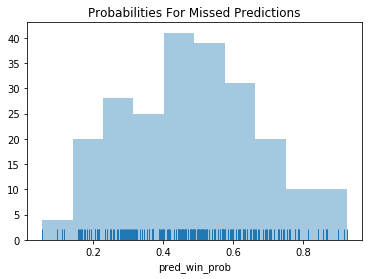

In [89]:
missed_predictions = test_games[test_games['game_result'] != 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

missed_predictions.pred_win_prob

sns.distplot(missed_predictions.pred_win_prob, kde=False, rug=True).set_title("Probabilities For Missed Predictions")

Text(0.5,1,'Probabilities For Correct Predictions')

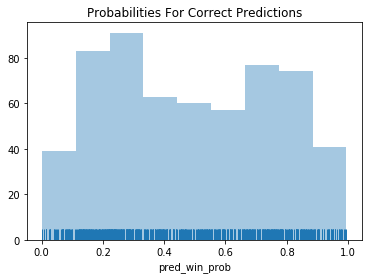

In [93]:
correct_predictions = test_games[test_games['game_result'] == 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

sns.distplot(correct_predictions.pred_win_prob, kde=False, rug=True).set_title("Probabilities For Correct Predictions")

In [94]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[304, 106],
       [122, 281]], dtype=int64)

Text(0.5,257.44,'Predicted label')

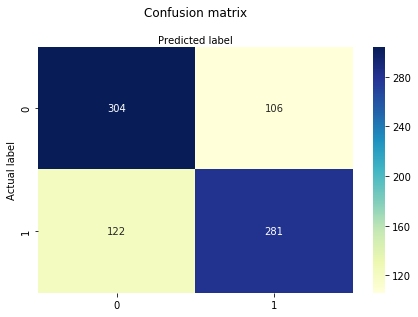

In [95]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7195571955719557
Precision: 0.7260981912144703
Recall: 0.6972704714640199


In [92]:
print("Log loss= ",log_loss(y_test, prediction_probabilities))

Log loss=  0.545128028005374
